In [2]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [17]:
data = pd.read_csv('../lab4/data.csv')
data.shape

(41188, 21)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [19]:
COLUMNS_FOR_FACTORISATION = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week', 'poutcome']
factorization_table = {}
for column in COLUMNS_FOR_FACTORISATION:
    data[column], table = pd.factorize(data[column])
    factorization_table[column] = pd.DataFrame(columns=[column], data=table)

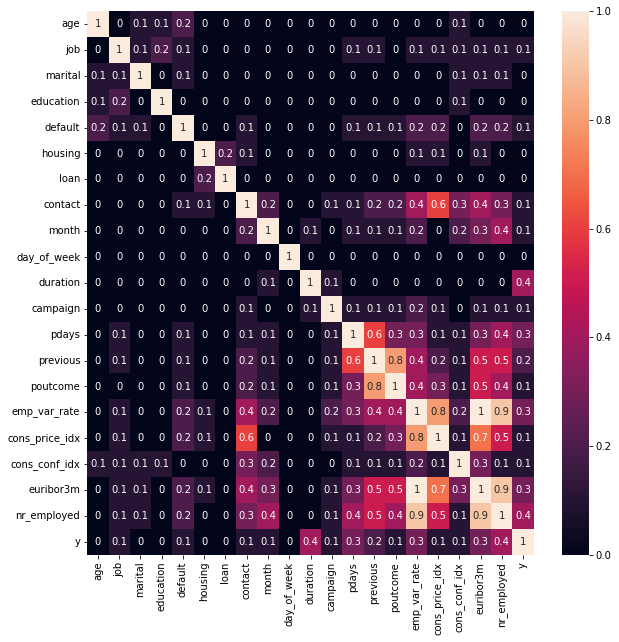

In [20]:
ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(round(abs(data.corr()), 1), annot=True)

In [21]:
data = data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'cons_conf_idx', 'y']]

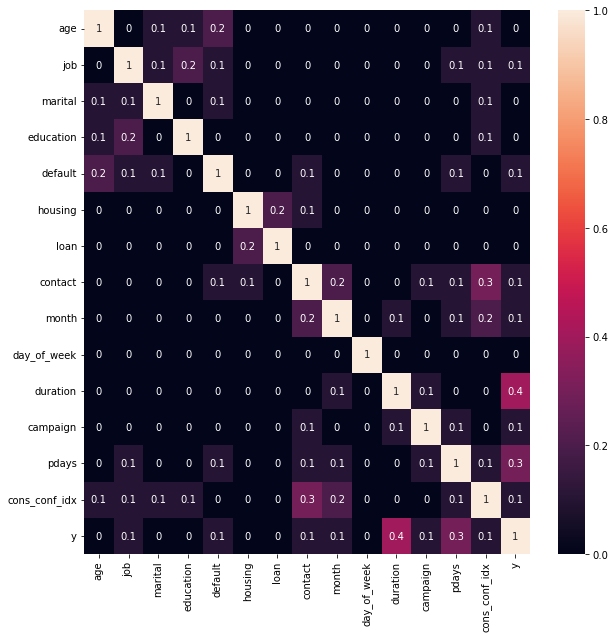

In [22]:
ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(round(abs(data.corr()), 1), annot=True)

In [23]:
train_input, test_input, train_output, test_output = train_test_split(data.drop("y", axis=1), data["y"],test_size=0.2)

In [24]:
for i in range(1, 21):
    model = tree.DecisionTreeClassifier(max_depth=i, criterion="entropy")
    model.fit(train_input, train_output)
    predictions = model.predict(test_input)
    
    print(f'Точность при максимальной глубине {i}: ', model.score(test_input, test_output))

Точность при максимальной глубине 1:  0.8856518572469045
Точность при максимальной глубине 2:  0.894027676620539
Точность при максимальной глубине 3:  0.9050740470988103
Точность при максимальной глубине 4:  0.9060451565914057
Точность при максимальной глубине 5:  0.9078659868900218
Точность при максимальной глубине 6:  0.9077445982034474
Точность при максимальной глубине 7:  0.9110220927409566
Точность при максимальной глубине 8:  0.9113862588006798
Точность при максимальной глубине 9:  0.9100509832483612
Точность при максимальной глубине 10:  0.9066521000242778
Точность при максимальной глубине 11:  0.9061665452779801
Точность при максимальной глубине 12:  0.9042243262927895
Точность при максимальной глубине 13:  0.9013109978150037
Точность при максимальной глубине 14:  0.8953629521728574
Точность при максимальной глубине 15:  0.8947560087399854
Точность при максимальной глубине 16:  0.8922068463219228
Точность при максимальной глубине 17:  0.888443797038116
Точность при максимальной

Text(0.5, 1.0, 'Матрица сходства')

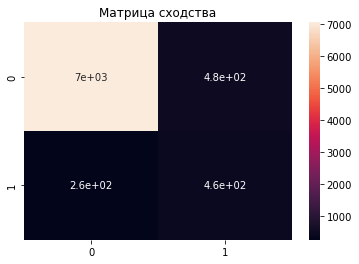

In [27]:
model = tree.DecisionTreeClassifier(max_depth=8, criterion="entropy")
model.fit(train_input, train_output)
predictions = model.predict(test_input)


confusion_matrix = sklearn.metrics.confusion_matrix(predictions, test_output)

sns.heatmap(
confusion_matrix,
annot=True
)
plt.title('Матрица сходства')

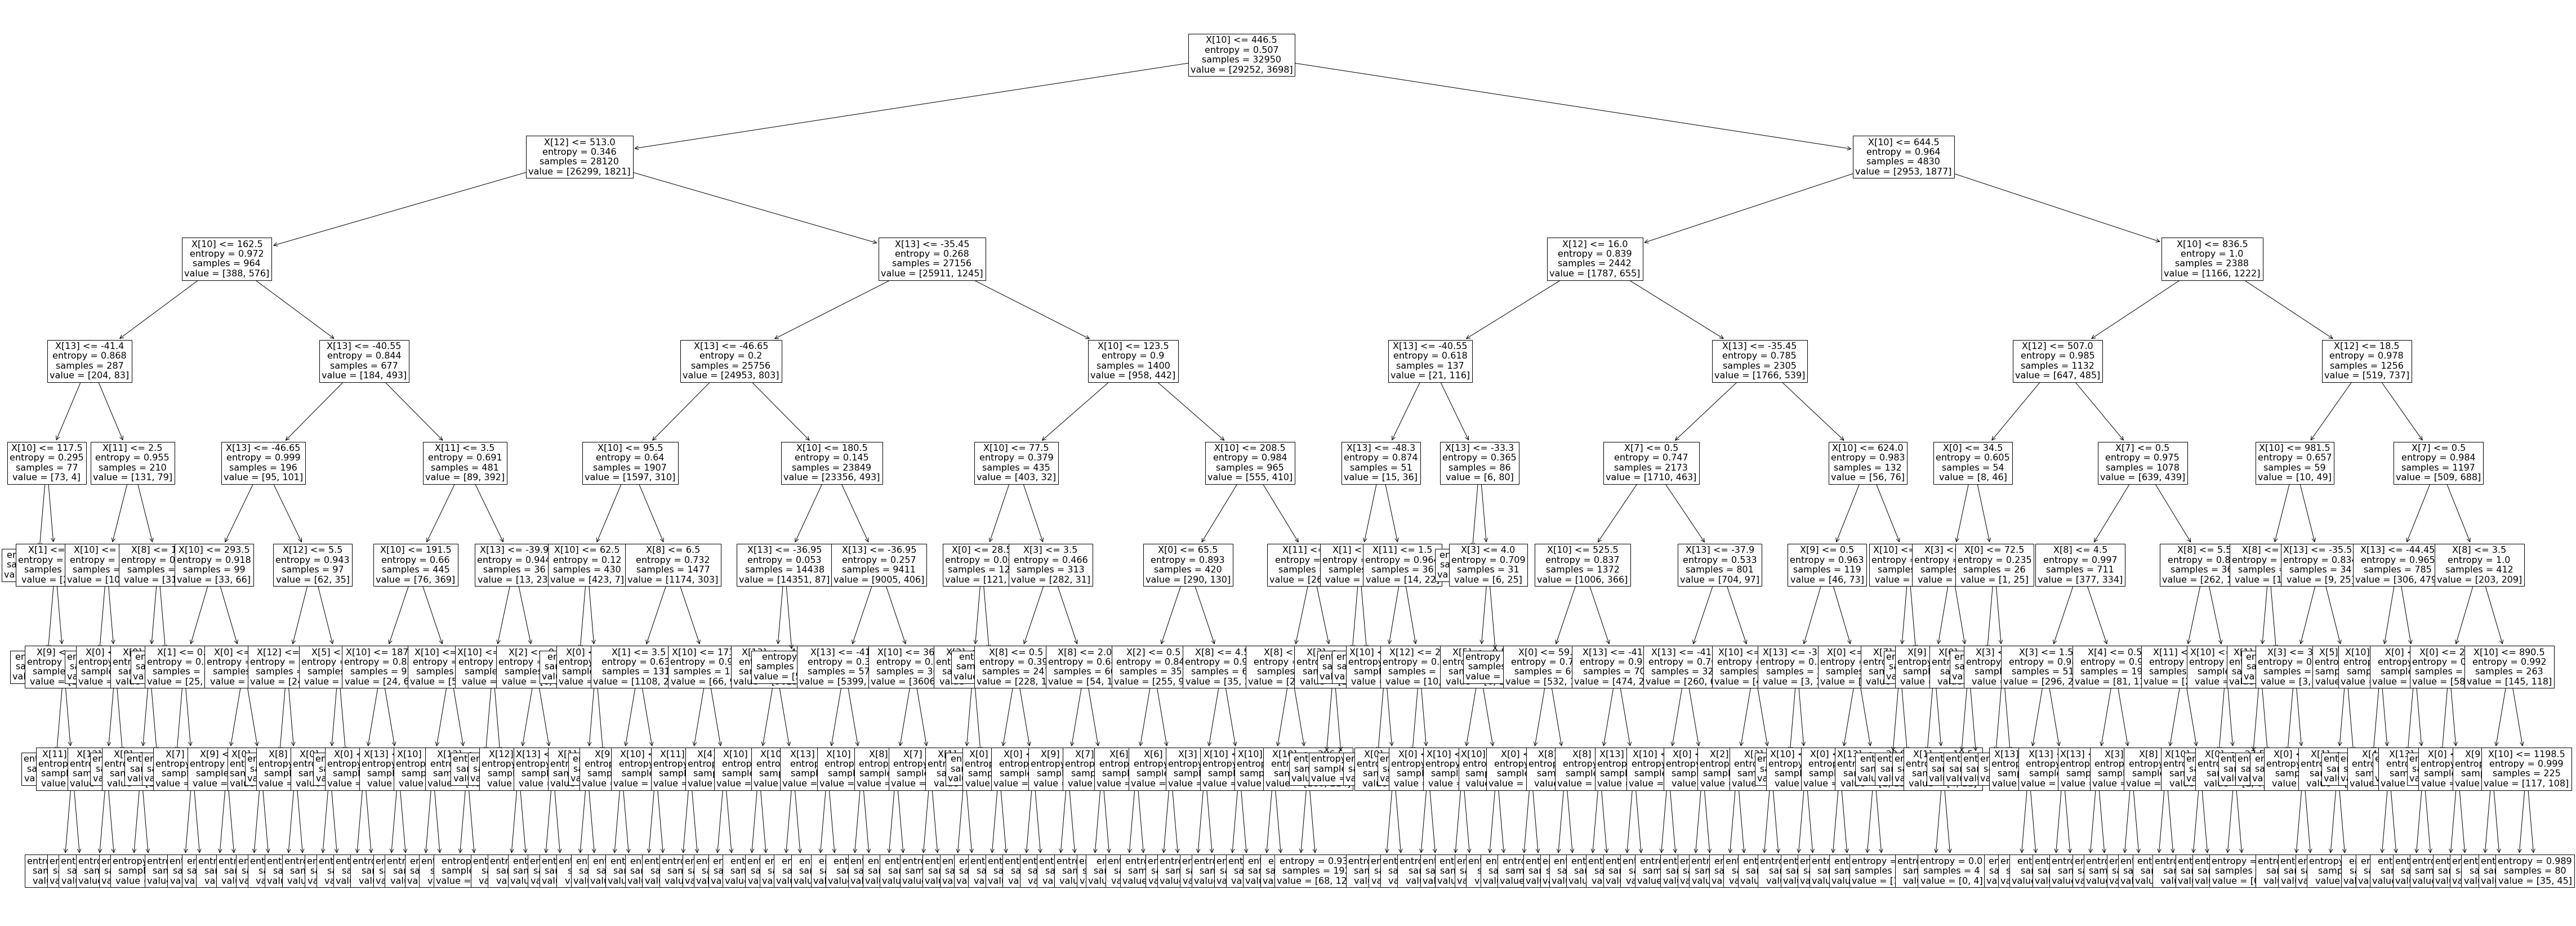

In [31]:
plt.figure(figsize=(80,30))
tree.plot_tree(model, fontsize=16)
plt.savefig('tree.png')
plt.show()